# Notebook for visualizing the results of a stylegan3 training


In [1]:
import os

dataset_name = f"oitaven"

experiment_number = 0
seed = 42
gpus = 2
batch = 128

dataset_file = dataset_name + "_train" + (f"_{seed}" if seed is not None else "")

results_dir = f"training-runs/{dataset_file.upper()}"
experiment_name = f"000{experiment_number:0>2}-stylegan3-t-{dataset_file}-gpus{gpus}-batch{batch}-gamma0.125"

file_name = "stats.jsonl"
training_options_file_name = "training_options.json"
dataset_summary_file_name = f"data/{dataset_name}/patches/processing_summary.json"

file_path = os.path.join(results_dir, experiment_name, file_name)
if not os.path.isfile(file_path):
    print(f"Error: The file {file_path} does not exist.")

import json

with open(dataset_summary_file_name, "r") as f:
    summary = json.load(f)

label_map = summary.get("label_map", {})
print("Label Map:", label_map)

# Labels for the classes
class_labels = [int(label) for label in label_map.keys()]
print("Class Labels:", class_labels)

Label Map: {'0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8, '8': 9, '9': 10}
Class Labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [2]:
from visualization_utils import (
    read_jsonl,
    extract_metrics,
    extract_classification_metrics,
    summarize_training_stats,
    summarize_training_options,
    extract_confusion_matrix,
    plot_confusion_matrix,
    plot_metric,
    print_accuracies_per_class,
    compute_overall_accuracy,
    plot_accuracies,
    extract_best_tick,
    compute_adversarial_starting_tick,
    class_colors,
)

In [3]:
adversarial_starting_tick = compute_adversarial_starting_tick(
    os.path.join(results_dir, experiment_name, training_options_file_name)
)
print(f"Adversarial Starting Tick: {adversarial_starting_tick}")

Adversarial Starting Tick: 0


/home/anton.gomez.lopez/Desktop/stylegan3-proxecto/stylegan3/visualization_utils.py:665: UserWarning: Warning: 'autoencoder_kimg' not found in training options.
  warnings.warn("Warning: 'autoencoder_kimg' not found in training options.", UserWarning)


In [4]:
summarize_training_options(os.path.join(results_dir, experiment_name, training_options_file_name))

📋 Training Configuration Summary
────────────────────────────────────
⚖️ Class weight: 0.1
🖥️ Number of GPUs: 2
📦 Batch size: 128
🎯 Uniform class labels: True
🧪 Discriminator on generated images: True
🖼️ Autoencoder kimg: None
🎛️  ADA target present ✅ → Value: 0.6


In [5]:
jsonl_data = read_jsonl(file_path)
metrics = extract_metrics(jsonl_data, class_labels=class_labels)
summarize_training_stats(metrics, exclude_first_tick=True)

🕒 Total time: 3h 17min 46s
📊 Total kimg: 1296.0
📈 Total ticks: 129
⏱️ Mean time per tick: 1min 25s (std: 6s)
⏳ Mean time per kimg: 8s (std: 0s)


In [6]:
print("────────────────────────────────────")
print("Using average accuracy as performance key")
print("────────────────────────────────────")
best_tick_performance = extract_best_tick(
    jsonl_data, class_labels, performance_key="avg", verbose=True, only_tick_with_pkl=False, network_snapshot_ticks=None
)

────────────────────────────────────
Using average accuracy as performance key
────────────────────────────────────
📊 Best Tick Performance Summary
────────────────────────────────────
⏱️  Tick: 125
🖼️  kimg: 1264.128
📈 Avg Accuracy (Train): 0.9205 ± 0.0363
📊 Avg Accuracy (Val):   0.9393 ± 0.0706
🏁 Overall Accuracy (Train): 0.9346
✅ Overall Accuracy (Val):   0.9384


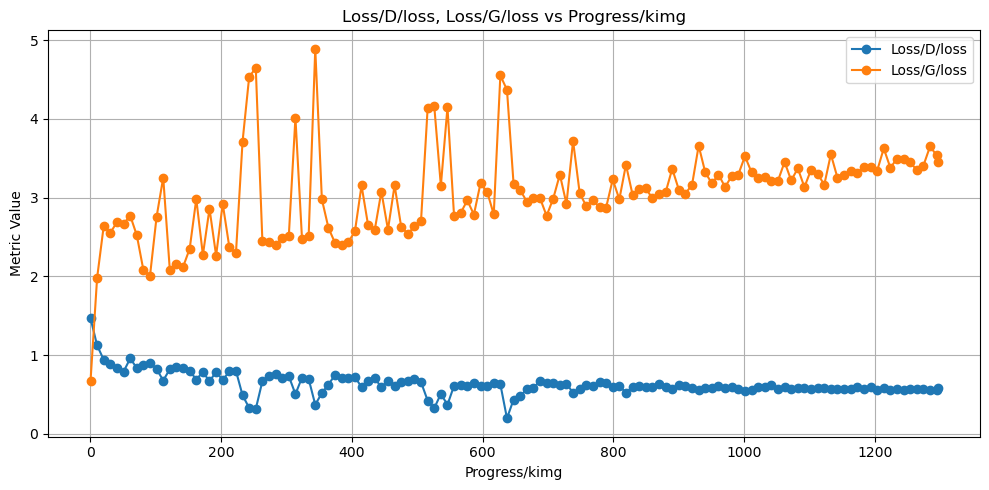

In [7]:
plot_metric(
    metrics, metrics=["Loss/D/loss", "Loss/G/loss"], x_axis="Progress/kimg", start_tick=adversarial_starting_tick
)

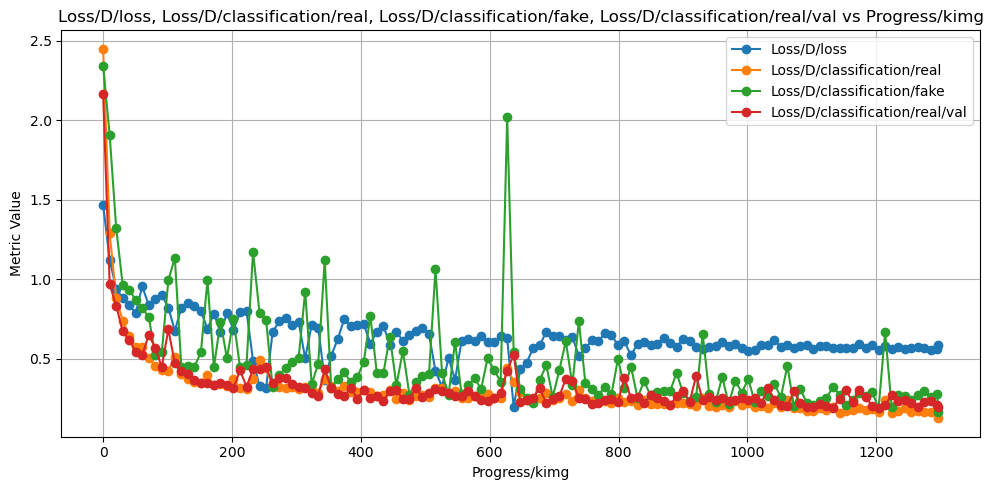

In [8]:
plot_metric(
    data=metrics,
    metrics=[
        "Loss/D/loss",
        "Loss/D/classification/real",
        "Loss/D/classification/fake",
        "Loss/D/classification/real/val",
    ],
    x_axis="Progress/kimg",
    start_tick=adversarial_starting_tick,
)

In [9]:
if "Loss/AE/loss" in metrics and any(metrics["Loss/AE/loss"]):
    plot_metric(metrics, metrics=["Loss/AE/loss"], x_axis="Progress/kimg", end_tick=adversarial_starting_tick)

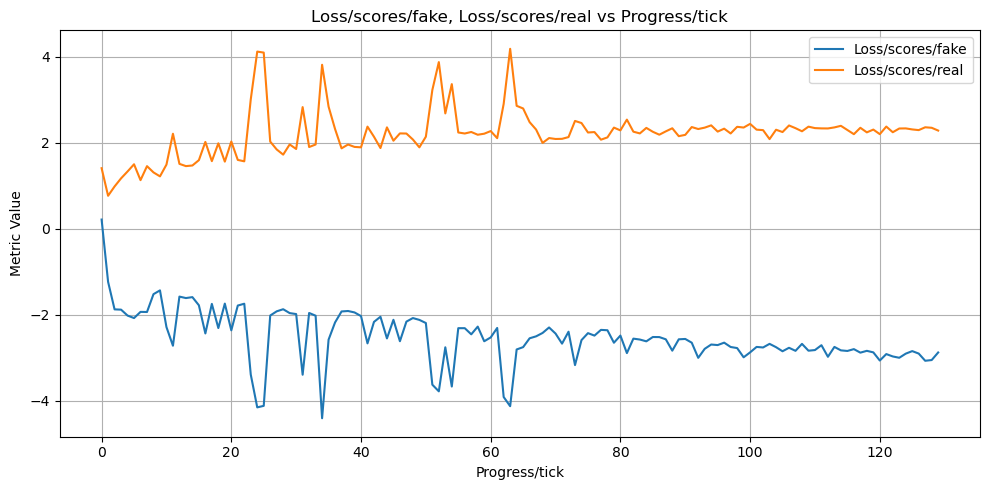

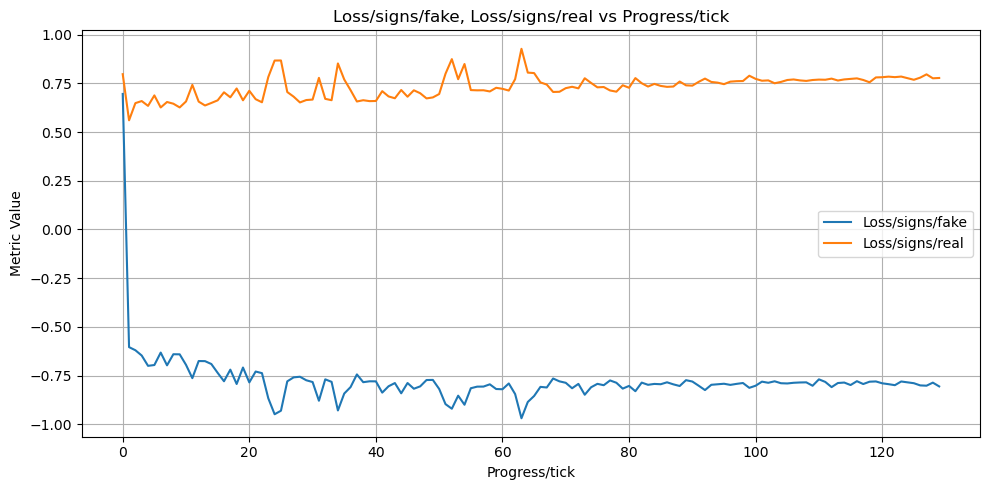

In [10]:
plot_metric(
    metrics,
    metrics=["Loss/scores/fake", "Loss/scores/real"],
    x_axis="Progress/tick",
    marker=None,
    start_tick=adversarial_starting_tick,
)
plot_metric(
    metrics,
    metrics=["Loss/signs/fake", "Loss/signs/real"],
    x_axis="Progress/tick",
    marker=None,
    start_tick=adversarial_starting_tick,
)

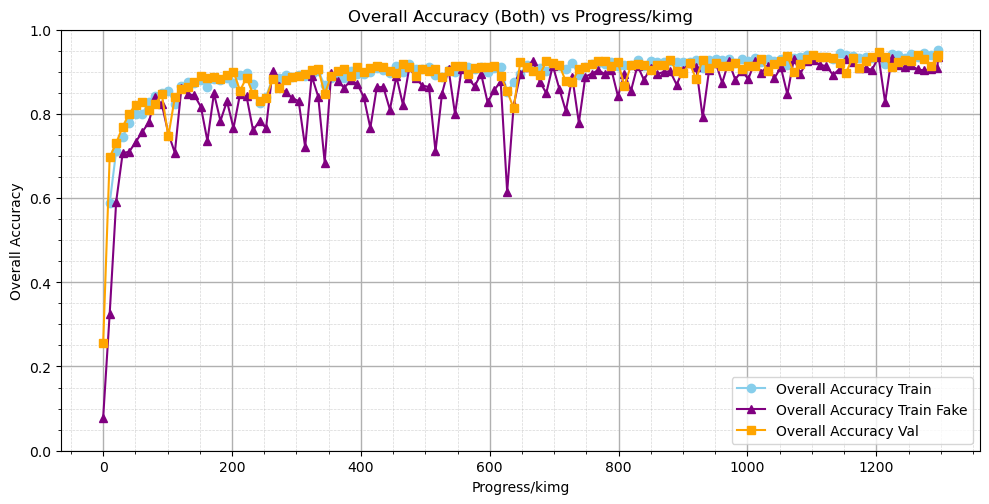

In [11]:
classification_metrics = extract_classification_metrics(jsonl_data, class_labels=class_labels)
metrics["overall_accuracy_train"], metrics["overall_accuracy_val"], metrics["overall_accuracy_train_fake"] = (
    compute_overall_accuracy(classification_metrics)
)
plot_accuracies(
    metrics,
    class_labels=class_labels,
    plot_std_in_avg_accuracy=False,
    plot_type="overall",
    dataset="both",
    include_fake=True,
    start_tick=adversarial_starting_tick,
)

Last 10 accuracies per class (val):
Class 0: ['0.935', '0.891', '0.739', '0.891', '0.826', '0.848', '0.739', '0.891', '0.848', '0.891']
Class 1: ['0.960', '0.920', '1.000', '0.960', '0.920', '0.960', '1.000', '0.960', '0.880', '0.960']
Class 2: ['0.944', '0.944', '0.889', '0.944', '1.000', '1.000', '0.944', '1.000', '0.944', '1.000']
Class 3: ['0.571', '0.429', '0.571', '0.571', '0.429', '1.000', '0.571', '0.714', '0.857', '0.857']
Class 4: ['0.913', '0.739', '0.565', '0.870', '0.739', '0.783', '0.696', '0.783', '0.913', '0.826']
Class 5: ['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '0.933', '1.000']
Class 6: ['0.925', '0.878', '0.951', '0.904', '0.925', '0.933', '0.936', '0.870', '0.913', '0.930']
Class 7: ['0.971', '0.984', '0.950', '0.968', '0.953', '0.963', '0.958', '0.963', '0.958', '0.963']
Class 8: ['1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000', '1.000']
Class 9: ['0.867', '0.823', '0.878', '0.878', '0.901', '0.906', 

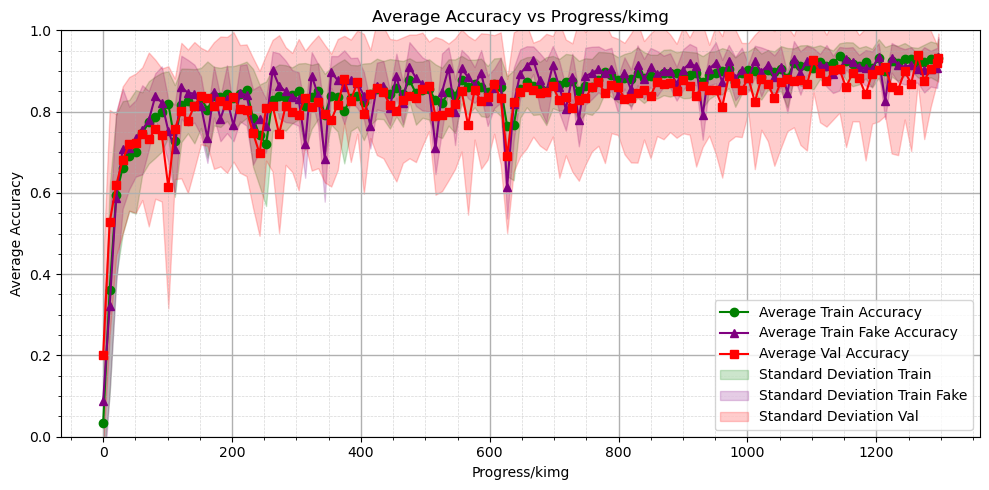

In [12]:
print_accuracies_per_class(metrics, class_labels, last_ticks=10, data_type="val")
plot_accuracies(
    metrics,
    class_labels=class_labels,
    plot_std_in_avg_accuracy=True,
    plot_type="average",
    dataset="both",
    include_fake=True,
    start_tick=adversarial_starting_tick,
)

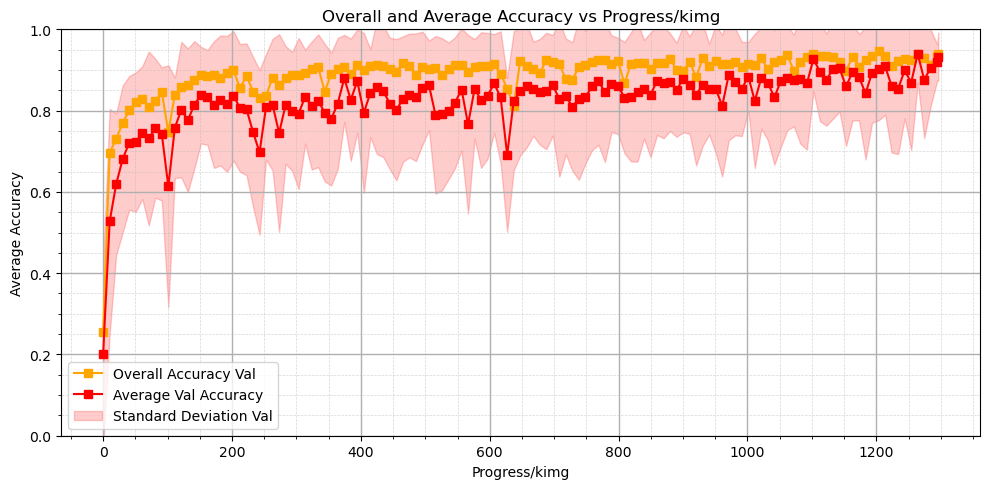

In [13]:
plot_accuracies(
    metrics,
    class_labels=class_labels,
    plot_std_in_avg_accuracy=True,
    plot_type="both",
    dataset="val",
    start_tick=adversarial_starting_tick,
)

In [14]:
class_names_map = [
    "Auga",
    "Terra",
    "Pedras",
    "Asfalto",
    "Formigón",
    "Tellados",
    "Prados",
    "Árbores Nativas",
    "Piñeiros",
    "Eucaliptos",
]

Tick: 18/18
kimg used for training: 173.056/173.056


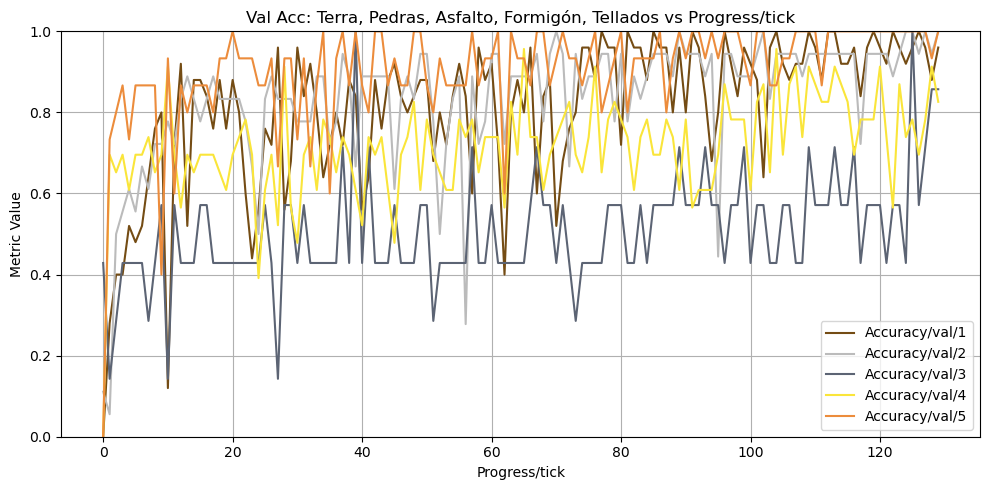

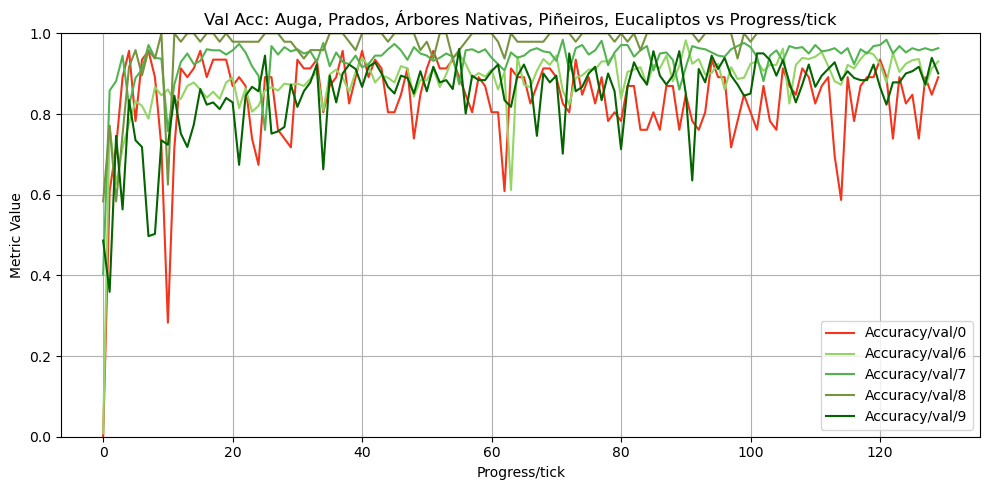

In [15]:
minority_class_labels = [1, 2, 3, 4, 5]
colors = [class_colors[c] for c in minority_class_labels]
plot_metric(
    metrics,
    metrics=[f"Accuracy/val/{c}" for c in minority_class_labels],
    x_axis="Progress/tick",
    marker=None,
    ylim=(0, 1),
    colors=colors,
    title="Val Acc: "
    + ", ".join(
        class_name for i, class_name in enumerate(class_names_map) if i in minority_class_labels and i in class_labels
    )
    + " vs Progress/tick",
    start_tick=adversarial_starting_tick,
)
mayority_class_labels = [0, 6, 7, 8, 9]
colors = [class_colors[c] for c in mayority_class_labels]
plot_metric(
    metrics,
    metrics=[f"Accuracy/val/{c}" for c in mayority_class_labels],
    x_axis="Progress/tick",
    marker=None,
    ylim=(0, 1),
    colors=colors,
    title="Val Acc: "
    + ", ".join(
        class_name for i, class_name in enumerate(class_names_map) if i in mayority_class_labels and i in class_labels
    )
    + " vs Progress/tick",
    start_tick=adversarial_starting_tick,
)

Tick: 129/129
kimg used for training: 1296.000/1296.000


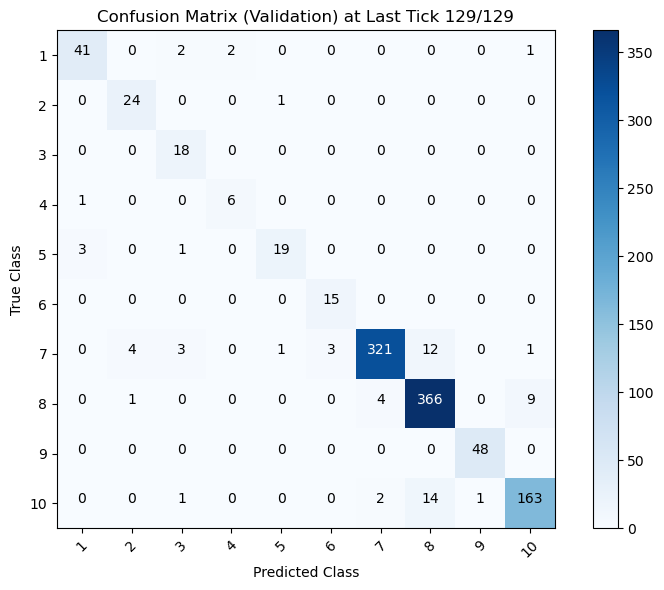

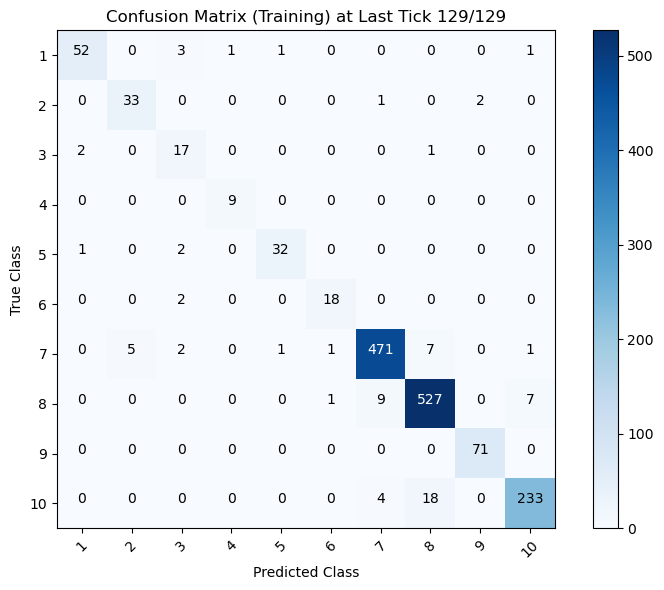

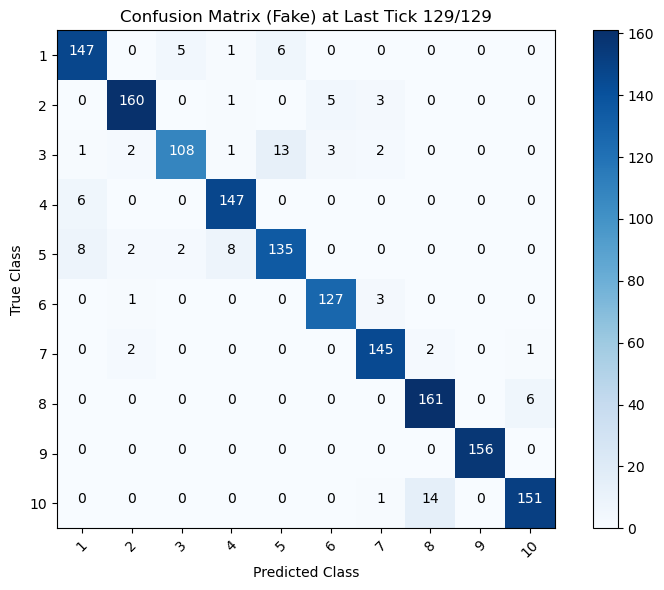

In [16]:
total_tick = int(metrics["Progress/tick"][-1])
total_kimg = float(metrics["Progress/kimg"][-1])

print(f"Tick: {total_tick}/{total_tick}")
print(f"kimg used for training: {total_kimg:.3f}/{total_kimg:.3f}")

# ------------- Validation ------------- #
confusion_matrix = extract_confusion_matrix(jsonl_data, class_labels=class_labels, data_type="val")
plot_confusion_matrix(
    confusion_matrix,
    class_labels=class_labels,
    title=f"Confusion Matrix (Validation) at Last Tick {total_tick}/{total_tick}",
)

# ------------- Training (real) ------------- #
confusion_matrix = extract_confusion_matrix(jsonl_data, class_labels=class_labels, data_type="real")
plot_confusion_matrix(
    confusion_matrix,
    class_labels=class_labels,
    title=f"Confusion Matrix (Training) at Last Tick {total_tick}/{total_tick}",
)

# ------------- Training (fake) ------------- #
confusion_matrix = extract_confusion_matrix(jsonl_data, class_labels=class_labels, data_type="fake")
plot_confusion_matrix(
    confusion_matrix, class_labels=class_labels, title=f"Confusion Matrix (Fake) at Last Tick {total_tick}/{total_tick}"
)